## 3. Machine Learning for Classification
We'll use logisitc regression to predict churn

### 3.1 Churn prediction project
- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

### 3.2 Data Preperation
- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_data.csv')

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [5]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
## contains numbers but dtype is object because we replaced spaces (no value) with _ 
df['totalcharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [8]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors = 'coerce')

In [9]:
df.totalcharges = df.totalcharges.fillna(0)

In [10]:
df.churn = (df.churn == 'yes').astype(int)

In [11]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


### 3.3 Setting up the validation framework
- peform the train/val/test split using scikit learn

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
df_full_train , df_test = train_test_split(df, test_size=.2, random_state=1)

In [134]:
df_train , df_val = train_test_split(df_full_train, test_size=.25, random_state=1)

In [135]:
len(df), len(df_train), len(df_val), len(df_test)

(7043, 4225, 1409, 1409)

In [136]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [137]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [138]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

### 3.4 EDA
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables 

In [139]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [20]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [21]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

0.26996805111821087

In [22]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [23]:
numerical = ['tenure','monthlycharges','totalcharges']

In [24]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [25]:
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [26]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.5 Feature importance: Churn rate and risk Ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable.\
- Churn rate
- Risk ratio
- Mutual information - later

In [27]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [28]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [29]:
global_churn_rate

0.26996805111821087

In [30]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [31]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_yes_partner = df_full_train[df_full_train.partner =='yes'].churn.mean()

In [32]:
churn_no_partner, churn_yes_partner

(0.3298090040927694, 0.20503330866025166)

#### Risk Ratio

In [33]:
churn_no_partner / global_churn_rate, churn_yes_partner / global_churn_rate

(1.2216593879412643, 0.7594724924338315)

In SQL we might do something like \
    SELECT gender\
    , avg(churn) as churn \
    , avg(churn) - global_churn_rate as diff\
    , avg(churn) / global_churn_rate as risk\
    from data\
    group by gender

To translate this into pandas we can do:

In [34]:
# this returns a series
df_group_series = df_full_train.groupby('gender').churn.mean()

In [35]:
df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [36]:
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


Now lets generalize for all categorical variables

In [37]:
from IPython.display import display

In [38]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


This gives us a sense of what categories within each field seem to be important factors in a users churn rate. \ 
If we want 1 number that we can use to say "feature x is more inflential than feature y in predicting churn, we can use Mutual information.

### 3.6 Feature importance: Mutual information
Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

In [39]:
from sklearn.metrics import mutual_info_score

In [40]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [41]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [1]:
for c in categorical:
    print(c)
    display(mutual_info_score(df_full_train.churn,df_full_train[c]))
    print()

NameError: name 'categorical' is not defined

### 3.7 Feature importance: Correlation
How about numerical columns?
- correlation coefficient

In [43]:
## We can use pearsons correlation coeffecient to understand how the numerical features 
## correlate with the target variable
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [44]:
df_full_train[df_full_train.tenure <=2].churn.mean()

0.5953420669577875

In [45]:
df_full_train[(df_full_train.tenure >2) & (df_full_train.tenure<=12)].churn.mean()

0.3994413407821229

In [46]:
df_full_train[df_full_train.tenure >12].churn.mean()

0.17634908339788277

### 3.8 One-hot encoding
- Use Scikit-Learn to encode categorical features

In [174]:
from sklearn.feature_extraction import DictVectorizer

In [175]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [176]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [177]:
dv = DictVectorizer(sparse = False)

In [178]:
X_train = dv.fit_transform(train_dicts)

In [179]:
X_train.shape

(4225, 45)

In [181]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [146]:
df_train.shape

(4225, 20)

In [182]:
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

### 3.9 Logistic Regression
- Binary classification
- Linear vs logistic regression

In [76]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [78]:
z = np.linspace(-7,7, 51)

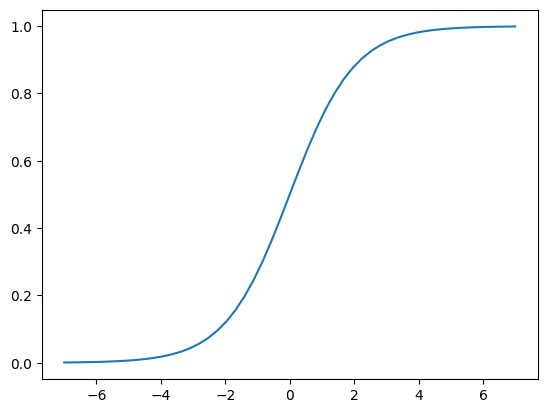

In [79]:
plt.plot(z,sigmoid(z))

In [80]:
### logistic regression is simply sigmoid( w0 + X.dot(w)) ~ sigmoid(linear equestion)

### 3.10 Training logisitc regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calcualte the accuracy

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [185]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [186]:
model.intercept_[0]

-0.10903521054753158

In [187]:
len(model.predict_proba(X_train))

4225

In [188]:
y_pred_soft = model.predict_proba(X_val)[:,1]
y_pred_hard = model.predict(X_val)

In [189]:
y_pred_soft

array([0.00899722, 0.20451861, 0.2122173 , ..., 0.13639118, 0.79976555,
       0.83740295])

In [190]:
y_pred_hard

array([0, 0, 0, ..., 0, 1, 1])

In [191]:
churn_decision = (y_pred >= .5)

In [192]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [193]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [194]:
y_pred_hard

array([0, 0, 0, ..., 0, 1, 1])

In [195]:
(y_val == y_pred_hard).mean()

0.8034066713981547

In [196]:
(y_val == churn_decision.astype(int)).mean()

0.8034066713981547

In [197]:
len(y_val), len(churn_decision)

(1409, 1409)

In [198]:
y_pred >=.5

array([False, False, False, ..., False,  True,  True])

### 3.11 Model interpretation
- look at coefficients
- train a smaller model with fewer features

In [199]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [200]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [201]:
small = ['contract','tenure','monthlycharges']

In [202]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_train[small].to_dict(orient=

In [203]:
dv_small = DictVectorizer(sparse = False)
X_train_small = dv_small.fit_transform(dicts_train_small)

In [204]:
model_small = LogisticRegression()

In [205]:
model_small.fit(X_train_small,y_train)

LogisticRegression()

In [209]:
w0 = model_small.intercept_[0]
w = model_small.coef_[0]

In [210]:
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [212]:
dict(zip(dv_small.get_feature_names_out(),w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [213]:
w0

-2.476775660276911

In [214]:
sigmoid(-2.47 +.97+50*.027 +5*(-.036))

0.41824062315816374

### 3.12 Using the model

In [215]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [216]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_full_train)

In [217]:
y_full_train = df_full_train.churn.values

In [218]:
del df_full_train['churn']

In [219]:
model = LogisticRegression()
model.fit(X_full_train,y_full_train)

LogisticRegression()

In [220]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [221]:
X_test = dv.transform(dicts_test)

In [223]:
y_predict = model.predict_proba(X_test)[:,1]

In [225]:
churn_decision = (y_predict >= .5)

In [226]:
(churn_decision.astype(int) == y_test).mean()

0.815471965933286

In [227]:
### using the model - imagine we have a brand new customer
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [230]:
X_small = dv.transform(customer)
model.predict_proba(X_small)

array([[0.5943189, 0.4056811]])

In [231]:
y_predict[10]

0.40568109779220823

In [232]:
y_test[10]

0